In [1]:
import pandas as pd
import sidetable
import regex as re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datos/attacks_pandas_9b.csv", index_col= 0)

Lo primero que tenemos que evaluar es en que columnas tenemos nulos y que cantidad tenemos en cada una. ¿Hay alguna columna con una gran cantidad de nulos? En caso de que sea así deberemos eliminarla.


In [3]:
df.stb.missing()

,missing,total,percent
age,6275,7789,80.562331
location,6168,7789,79.188599
area,6163,7789,79.124406
country,6127,7789,78.662216
country_,6127,7789,78.662216
year,6117,7789,78.533830
type,6117,7789,78.533830
mes,2395,7789,30.748491
fatal_(y/n)_limpio,2111,7789,27.102324
date,1503,7789,19.296444


Vemos que las primeras 9 columnas de 15 tienen más de un 75% de nulos, probablemente haríamos un fichero nuevo sin los nulos, una copia, porque reemplazar los datos en esas columnas, ay que son más de la mitad nos parece que estaríamos falseando mucho los datos, teniendo en cuenta que las mayoría de columnas de las que tiene más de un  75% de nulos son las columnas en las que se basa el estudio de las hipotesis a probar.

No obstante para realizar los ejercicios haremos una copia del df y haremos los reemplazos.

In [4]:
df_copia = df.copy()

Es el momento de eliminar los nulos:
- Reemplazad los valores nulos de la columna age por la media de la edad, redondeada a dos decimales.


In [5]:
df["age"] = pd.to_numeric(df["age"])

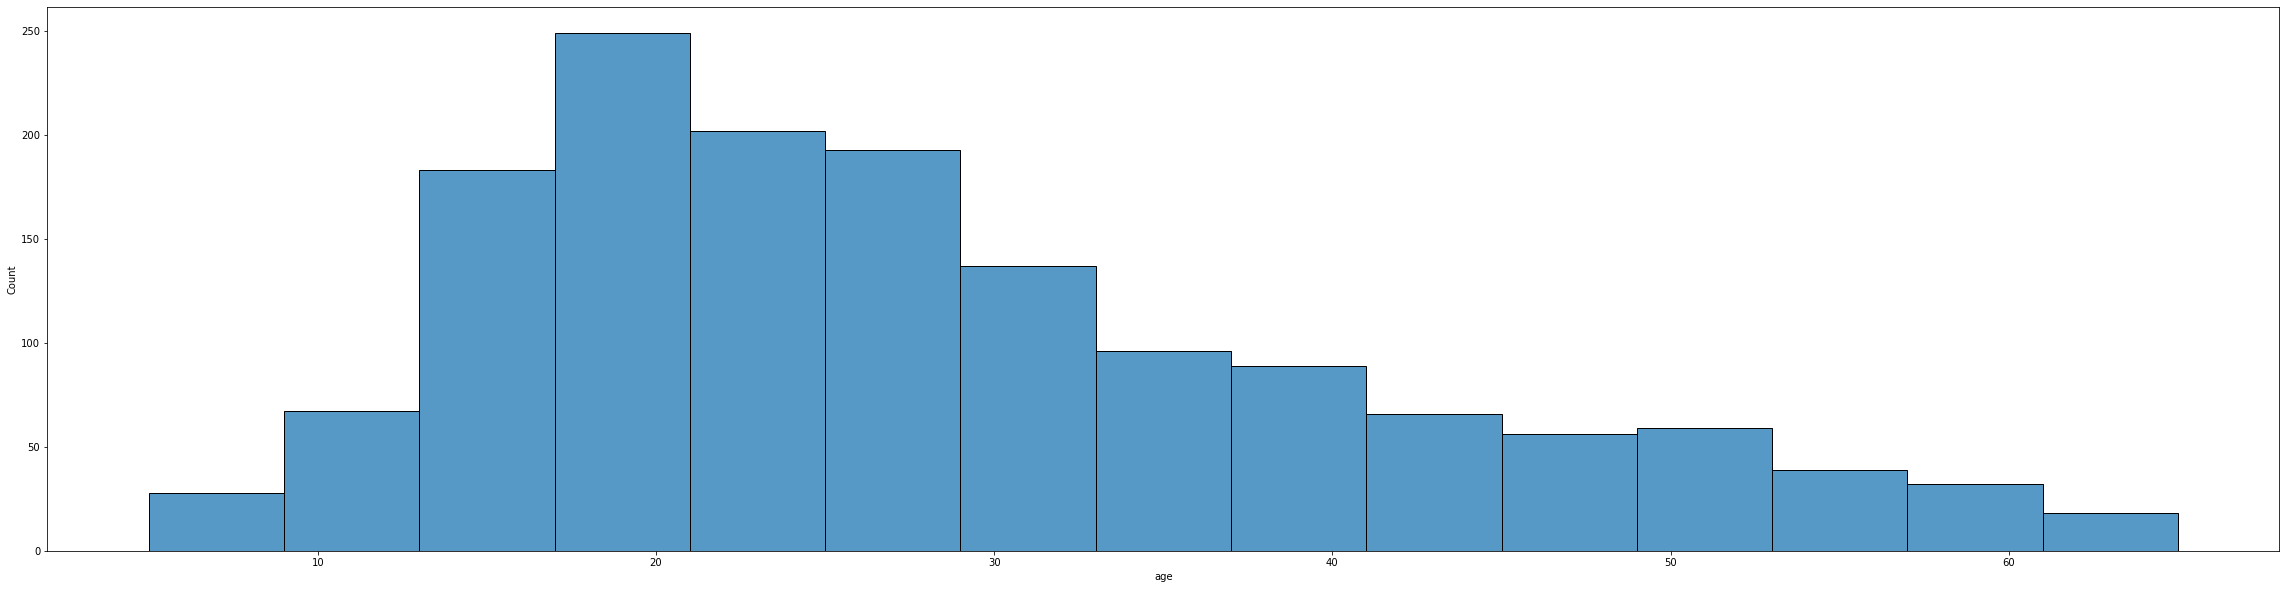

In [6]:
plt.figure(figsize=(40,10))

fig = sns.histplot( x="age", data=df_copia, bins=15)

#Sacamos el histograma para ver la distribución de los datos y así decidir que método estadístico usar. Usamos la mediana, ya que una media podría alterar mucho los resultados.

In [7]:
df["age"].median()

25.0

Como la mediana es un número entero, no necesitamos redondear a decimales.

In [8]:
df_copia["age"].fillna(df["age"].median(), inplace=True)

In [9]:
df_copia["age"].isnull().sum()

0

In [10]:
df_copia.sample(4)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
4369,1984.10.17,NaN,NaN,NaN,NaN,NaN,25.0,Unspecified,17-Oct-1984,Oct,NaN,M,NaN
3903,1994.12.11,NaN,NaN,NaN,NaN,NaN,25.0,Unspecified,11-Dec-1994,Dec,N,M,NaN
353,2010.04.13,2010.0,Unprovoked,south africa,Eastern Cape Province,"East Beach, Port Alfred",35.0,Unspecified,NaN,NaN,NaN,M,south africa
2049,2014.06.01.b,NaN,NaN,NaN,NaN,NaN,25.0,Unspecified,01-Jun-2014,Jun,N,F,NaN


En relación a la columna de country al tratarse de una columna de tipo categórica, reemplazad los valores nulos por una nueva categória que se llame Unknown.


In [11]:
df_copia["country"].replace(np.nan,"Unknown", inplace=True)

In [12]:
df_copia["country"].isnull().sum()

0

In [13]:
df_copia.sample(4)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
2874,2007.05.16,NaN,NaN,Unknown,NaN,NaN,25.0,Unspecified,16-May-2007,May,N,M,NaN
1661,ND.0011,1997.0,Unprovoked,asia?,NaN,NaN,25.0,Unspecified,NaN,NaN,NaN,M,asia?
163,2014.10.02.a,2014.0,Unprovoked,australia,Western Australia,"Kelpids Beach, Wylie Bay, Esperance",23.0,White Shark,02-Oct-2014,Oct,N,M,australia
1271,1963.06.01.b,1963.0,Unprovoked,greece,Thessaly,near Trikerion Island,42.0,White Shark,NaN,NaN,NaN,F,greece


Reemplazad los valores nulos de la columna fatal por Unknown.


In [14]:
df_copia["fatal_(y/n)_limpio"].fillna("Unknown", inplace=True)

In [15]:
df_copia["fatal_(y/n)_limpio"].isnull().sum()

0

In [16]:
df_copia.sample(4)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
5167,1964.07.00.b,NaN,NaN,Unknown,NaN,NaN,25.0,Unspecified,Jul-1964,NaN,Y,M,NaN
506,2006.11.11,2006.0,Unprovoked,usa,Hawaii,"Kihei, Maui",29.0,Unspecified,NaN,NaN,Unknown,M,usa
1424,1947.03.09,1947.0,Unprovoked,south africa,KwaZulu-Natal,"Country Club Beach, Durban",22.0,Unspecified,NaN,NaN,Unknown,M,south africa
1105,1981.03.25,1981.0,Unprovoked,usa,Florida,"Singer Island, Riviera Beach, Palm Beach County",19.0,Bull Shark,NaN,NaN,Unknown,M,usa


Reemplazad los valores nulos de la columna type por el valor más frecuente (la moda).


In [17]:
# Como en base a las preguntas de la hipotesis hemos borrado la columna type, ya que hemos interpretado que la en esta pregunta: "¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?"
# Se refería a si era fatal o no, vamos a aplicar este  ejercicio sobre la columna "injury", que también es de tipo categórico.

In [18]:
df_copia["type"].replace(np.nan, df_copia["type"].mode()[0], inplace=True)

In [19]:
df_copia["type"].isnull().sum()

0

In [20]:
df_copia.sample(2)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
5124,1965.03.23,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,23-Mar-1965,Mar,Unknown,F,NaN
3886,1995.04.13,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,13-Apr-1995,Apr,N,M,NaN


In [21]:
df_copia.sample(5)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
4252,1987.12.20,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,20-Dec-1987,Dec,Y,F,NaN
3741,1997.07.02.R,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,2-Jul-1997,Jul,N,M,NaN
6129,1944.10.24,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,24-Oct-1944,Oct,Y,F,NaN
5395,1961.04.16.b,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,16-Apr-1961,Apr,N,F,NaN
4411,1983.11.10,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,10-Nov-1983,Nov,Unknown,F,NaN


Reemplazad los valores nulos de la columna fecha por Unknown.


In [22]:
df_copia["date"].replace(np.nan, "Unknown", inplace=True)

In [23]:
df_copia["date"].isnull().sum()

0

Guardad el csv para seguir trabajando con el en los siguientes ejercicios de pair

In [24]:
df_copia.to_csv("datos/attacks_pandas_10b.csv")